In [233]:
import re
import pandas as pd
from datetime import datetime

In [234]:
f=open(r'.\chats\WhatsApp Chat with CSRL batch 12.txt','r',encoding='utf-8')

In [235]:
data=f.read()

In [236]:
print(data)

8/3/22, 14:56 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
8/3/22, 14:56 - Khushali Mam CSRL created group "CSRL 12"
8/3/22, 14:56 - Khushali Mam CSRL added you
8/3/22, 14:56 - Khushali Mam CSRL: https://meet.google.com/pjq-bjop-rgq
8/3/22, 14:57 - Khushali Mam CSRL: Join kro link warna phone aj sbka chinega
8/3/22, 14:57 - Khushali Mam CSRL: Warning
8/3/22, 14:57 - Khushali Mam CSRL added Aniket National Super 100
8/3/22, 14:57 - Khushali Mam CSRL added ~ Srishty Sangwan
8/3/22, 15:00 - Khushali Mam CSRL: <Media omitted>
8/3/22, 15:00 - Siddhant Ghildiyal CSRL Super 30: Me rashi ke saath baitha hu ..
8/3/22, 15:01 - Khushali Mam CSRL: Ok
8/3/22, 15:01 - Sachin Super 30: Hm aniket  ke sath hai mera net slow chl rha
8/3/22, 15:01 - Khushali Mam CSRL: Ok
8/3/22, 15:02 - Akash Singh RPVV GANDHI NAGAR: Mei bhi hai mam
8/3/22, 15:02 - Khushali Mam CSRL: Ok
8/3/22, 15:02 - Khushali Mam CSRL: Jisko jo bolna h yhi bol l

In [237]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}(?:\s?(?:am|pm))?\s-\s'


In [238]:
messages = re.split(pattern, data)[1:]

In [239]:
len(messages)

1902

In [240]:
dates = re.findall(pattern, data)

In [241]:
dates

['8/3/22, 14:56 - ',
 '8/3/22, 14:56 - ',
 '8/3/22, 14:56 - ',
 '8/3/22, 14:56 - ',
 '8/3/22, 14:57 - ',
 '8/3/22, 14:57 - ',
 '8/3/22, 14:57 - ',
 '8/3/22, 14:57 - ',
 '8/3/22, 15:00 - ',
 '8/3/22, 15:00 - ',
 '8/3/22, 15:01 - ',
 '8/3/22, 15:01 - ',
 '8/3/22, 15:01 - ',
 '8/3/22, 15:02 - ',
 '8/3/22, 15:02 - ',
 '8/3/22, 15:02 - ',
 '8/3/22, 15:02 - ',
 '8/3/22, 15:02 - ',
 '8/3/22, 15:05 - ',
 '8/3/22, 15:05 - ',
 '8/3/22, 15:07 - ',
 '8/3/22, 15:08 - ',
 '8/3/22, 15:08 - ',
 '8/3/22, 15:08 - ',
 '8/3/22, 15:09 - ',
 '8/3/22, 15:09 - ',
 '8/3/22, 15:10 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 15:11 - ',
 '8/3/22, 21:11 - ',
 '8/3/22, 21:11 - ',
 '8/3/22, 21:52 - ',
 '8/3/22, 21:54 - ',
 '8/3/22, 21:57 - ',
 '8/3/22, 22:12 - ',
 '8/3/22, 22:12 - ',
 '8/3/22, 22:13 - ',
 '8/3/22, 22:13 - ',
 '8/3/22, 22:13 - ',
 '8/3/22, 22:14 - ',
 '8/3/22, 22:15 - ',
 '8/3/22, 22:15 - ',
 '8/3/22, 22:

In [242]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

In [243]:
def parse_date(date_str):
        date_str = date_str.strip(" -")  # remove trailing " - "
        # Try both 24-hour and 12-hour formats
        for fmt in ("%d/%m/%Y, %H:%M", "%d/%m/%y, %H:%M",
                    "%d/%m/%Y, %I:%M %p", "%d/%m/%y, %I:%M %p"):
            try:
                return datetime.strptime(date_str, fmt)
            except ValueError:
                continue
        return None

    # Convert to datetime (will always be in 24-hour once parsed)
df['message_date'] = df['message_date'].apply(parse_date)
df.rename(columns={'message_date': 'date'}, inplace=True)

In [244]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2022-03-08 14:56:00
1,"Khushali Mam CSRL created group ""CSRL 12""\n",2022-03-08 14:56:00
2,Khushali Mam CSRL added you\n,2022-03-08 14:56:00
3,Khushali Mam CSRL: https://meet.google.com/pjq...,2022-03-08 14:56:00
4,Khushali Mam CSRL: Join kro link warna phone a...,2022-03-08 14:57:00


In [245]:

# Split user and message
users, messages = [], []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name exists
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\prava\AppData\Local\Temp\ipykernel_6716\3671222667.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


In [246]:
df.head()

,date,user,message
0,2022-03-08 14:56:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2022-03-08 14:56:00,group_notification,"Khushali Mam CSRL created group ""CSRL 12""\n"
2,2022-03-08 14:56:00,group_notification,Khushali Mam CSRL added you\n
3,2022-03-08 14:56:00,Khushali Mam CSRL,https://meet.google.com/pjq-bjop-rgq\n
4,2022-03-08 14:57:00,Khushali Mam CSRL,Join kro link warna phone aj sbka chinega\n


In [247]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [248]:
from urlextract import URLExtract
extractor=URLExtract()

In [249]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [250]:
x=df['user'].value_counts().head(5)

In [251]:
import matplotlib.pyplot as plt

In [252]:
name=x.index
count=x.values

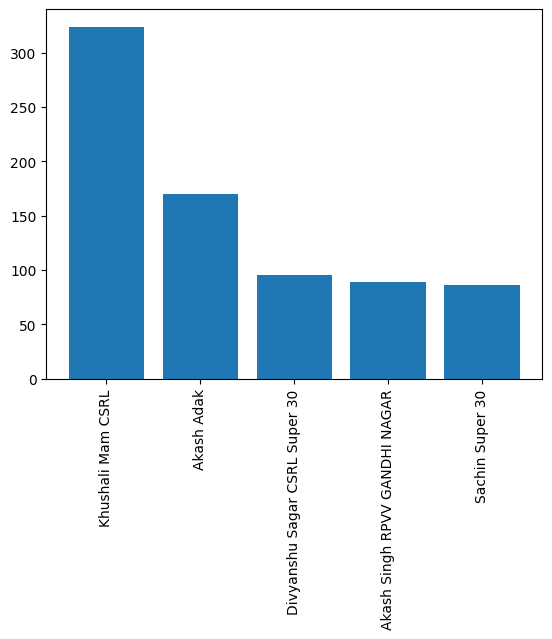

In [253]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [254]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,Khushali Mam CSRL,17.03
1,Akash Adak,8.94
2,Divyanshu Sagar CSRL Super 30,4.99
3,Akash Singh RPVV GANDHI NAGAR,4.68
4,Sachin Super 30,4.52
5,Mayank Yadav NS 100,4.47
6,Paras Jain CSRL,4.42
7,Aditya Super 30,4.36
8,Aniket National Super 100,4.10
9,Sumit Pandey CSRL,3.58


In [255]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [256]:
# remove group messages
# remove media omitted messages
# remove stop words

In [257]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [258]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()


In [259]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [260]:
from collections import Counter
pd.DataFrame(Counter(words).most_common())

,0,1
0,happy,185
1,birthday,160
2,message,142
3,deleted,121
4,mam,70
...,...,...
2383,🤥,1
2384,"nhi,",1
2385,🙂,1
2386,burdar,1


In [261]:
df['message']

0       Messages and calls are end-to-end encrypted. O...
1             Khushali Mam CSRL created group "CSRL 12"\n
2                           Khushali Mam CSRL added you\n
3                  https://meet.google.com/pjq-bjop-rgq\n
4             Join kro link warna phone aj sbka chinega\n
                              ...                        
1897                                  priorities burdar\n
1898                         personal pr block hai kya?\n
1899                                                 😂😂\n
1900                                    <Media omitted>\n
1901                            Happy Birthday mayank 🥳\n
Name: message, Length: 1902, dtype: object

In [262]:
import emoji

In [263]:
emojis=[]
for message in  df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [264]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🥳,102
1,🎉,92
2,🎂,56
3,😂,54
4,🏻,27
...,...,...
103,👌,1
104,🌝,1
105,🫱,1
106,🫲,1


In [276]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2022-03-08 14:56:00,group_notification,Messages and calls are end-to-end encrypted. O...,2022-03-08,2022.0,3.0,March,8.0,Tuesday,14.0,56.0,14.0-15.0
1,2022-03-08 14:56:00,group_notification,"Khushali Mam CSRL created group ""CSRL 12""\n",2022-03-08,2022.0,3.0,March,8.0,Tuesday,14.0,56.0,14.0-15.0
2,2022-03-08 14:56:00,group_notification,Khushali Mam CSRL added you\n,2022-03-08,2022.0,3.0,March,8.0,Tuesday,14.0,56.0,14.0-15.0
3,2022-03-08 14:56:00,Khushali Mam CSRL,https://meet.google.com/pjq-bjop-rgq\n,2022-03-08,2022.0,3.0,March,8.0,Tuesday,14.0,56.0,14.0-15.0
4,2022-03-08 14:57:00,Khushali Mam CSRL,Join kro link warna phone aj sbka chinega\n,2022-03-08,2022.0,3.0,March,8.0,Tuesday,14.0,57.0,14.0-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,NaT,Anoop Mishra,priorities burdar\n,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
1898,NaT,Neeraj Mittal CSRL Super 30,personal pr block hai kya?\n,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
1899,NaT,Aditya Super 30,😂😂\n,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
1900,NaT,Sujal CSRL Super 30,<Media omitted>\n,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan


In [266]:
df['month_num']=df['date'].dt.month

In [267]:
df

,date,user,message,month_num
0,2022-03-08 14:56:00,group_notification,Messages and calls are end-to-end encrypted. O...,3.0
1,2022-03-08 14:56:00,group_notification,"Khushali Mam CSRL created group ""CSRL 12""\n",3.0
2,2022-03-08 14:56:00,group_notification,Khushali Mam CSRL added you\n,3.0
3,2022-03-08 14:56:00,Khushali Mam CSRL,https://meet.google.com/pjq-bjop-rgq\n,3.0
4,2022-03-08 14:57:00,Khushali Mam CSRL,Join kro link warna phone aj sbka chinega\n,3.0
...,...,...,...,...
1897,NaT,Anoop Mishra,priorities burdar\n,NaN
1898,NaT,Neeraj Mittal CSRL Super 30,personal pr block hai kya?\n,NaN
1899,NaT,Aditya Super 30,😂😂\n,NaN
1900,NaT,Sujal CSRL Super 30,<Media omitted>\n,NaN


In [268]:
import preprocessor
df=preprocessor.preprocess(data)

In [269]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [270]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [271]:
timeline['time']=time

In [272]:
timeline

,year,month_num,month,message,time
0,2022.0,1.0,January,20,January-2022.0
1,2022.0,3.0,March,48,March-2022.0
2,2022.0,4.0,April,49,April-2022.0
3,2022.0,5.0,May,118,May-2022.0
4,2022.0,6.0,June,12,June-2022.0
5,2022.0,7.0,July,35,July-2022.0
6,2022.0,8.0,August,14,August-2022.0
7,2022.0,9.0,September,18,September-2022.0
8,2022.0,10.0,October,4,October-2022.0
9,2022.0,11.0,November,39,November-2022.0


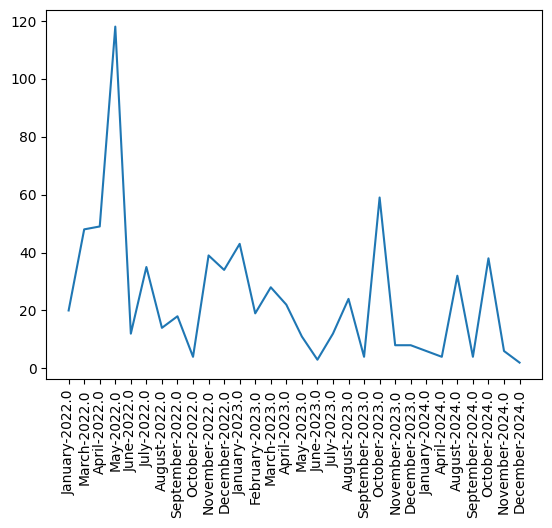

In [273]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [274]:
df['day_name']=df['date'].dt.day_name()

In [275]:
df['day_name'].value_counts()

day_name
Monday       159
Sunday       130
Thursday     120
Tuesday       88
Wednesday     87
Saturday      81
Friday        59
Name: count, dtype: int64

In [ ]:
activity_heatmap=df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period,00-1,1.0-2.0,10.0-11.0,11.0-12.0,12.0-13.0,13.0-14.0,14.0-15.0,15.0-16.0,16.0-17.0,17.0-18.0,...,19.0-20.0,2.0-3.0,20.0-21.0,21.0-22.0,22.0-23.0,23-00,6.0-7.0,7.0-8.0,8.0-9.0,9.0-10.0
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,1.0,0.0,0.0,7.0,3.0,11.0,1.0,11.0,5.0,4.0,...,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,3.0,5.0
Monday,3.0,1.0,35.0,20.0,26.0,11.0,11.0,3.0,0.0,4.0,...,3.0,0.0,4.0,23.0,1.0,7.0,0.0,0.0,2.0,1.0
Saturday,3.0,0.0,0.0,2.0,1.0,6.0,0.0,0.0,2.0,0.0,...,5.0,0.0,9.0,1.0,29.0,20.0,0.0,0.0,1.0,2.0
Sunday,5.0,7.0,3.0,63.0,7.0,2.0,12.0,6.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
Thursday,0.0,0.0,36.0,5.0,1.0,10.0,1.0,1.0,2.0,12.0,...,7.0,1.0,12.0,0.0,2.0,5.0,1.0,1.0,3.0,1.0
Tuesday,0.0,0.0,0.0,0.0,0.0,5.0,8.0,26.0,1.0,0.0,...,0.0,0.0,1.0,5.0,11.0,27.0,0.0,0.0,0.0,3.0
Wednesday,2.0,0.0,13.0,7.0,12.0,2.0,4.0,1.0,0.0,1.0,...,16.0,3.0,2.0,6.0,3.0,1.0,0.0,1.0,1.0,3.0
